In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import sympy.physics.units as u
import sympy as sp
import numpy as np
import logging as log
import functools
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
%matplotlib inline
from IPython.display import display, HTML

import importlib.util
#spec = importlib.util.spec_from_file_location("miptlabs", "/full/path/to/miptlabs.py")
#miptlabs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(miptlabs)
#ml = miptlabs

import miptlabs as ml
importlib.reload(ml)

import sys, importlib
importlib.reload(log)
log.basicConfig(level=log.INFO, format='LOG %(message)s', stream=sys.stdout)

sp.Basic.__str__=lambda expr, **settings:ml.PQStrPrinter(settings).doprint(expr)

sp.__version__

'1.1.2.dev'

In [88]:
C = ml.PQ(3e-9*u.farad, epsilon=0.05)
R = ml.PQ(75*u.ohm, sigma=0.1*u.ohm)
R0 = ml.PQ(1*u.ohm, sigma=0.1*u.ohm)
R1 = ml.PQ(500*u.ohm, sigma=0.1*u.ohm)
R2 = ml.PQ(3000*u.ohm, sigma=0.1*u.ohm)
L = ml.PQ(100e-3*u.henry, sigma=0.1e-3*u.henry)
f = 1/(2*np.pi*(C*L)**(sp.Rational(1,2)))
print(f) # Приблизительная резонансная частота контура (по примерному значению индуктивности)

9190±230 1/(sqrt(F)*sqrt(H)) (2.5%)


In [89]:
data = pd.read_csv('lab2.2.2.csv')
df = pd.DataFrame()
df2 = pd.DataFrame()
df['f.0'] = data.apply(lambda row: ml.PQ(row['f']*1e3*u.hz, sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.0'] = data.apply(lambda row: ml.PQ(row['U']*row['U_mult']*1e-3*u.volt, 
                                         sigma=0.2*row['U_mult']*1e-3*u.volt), axis=1)

df['f.1'] = data.apply(lambda row: ml.PQ(row['f.1']*1e3*u.hz, sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.1'] = data.apply(lambda row: ml.PQ(row['U.1']*row['U_mult.1']*10e-3*u.volt, 
                                           sigma=0.2*row['U_mult.1']*1e-3*u.volt), axis=1)

df['f.2'] = data[~data['f.2'].isnull()].apply(lambda row: ml.PQ(row['f.2']*1e3*u.hz, 
                                                                  sigma=row['f_sigma']*1e3*u.hz), axis=1)
df['U.2'] = data[~data['U.2'].isnull()].apply(lambda row: ml.PQ(row['U.2']*row['U_mult.2']*10e-3*u.volt, 
                                           sigma=0.2*row['U_mult.2']*1e-3*u.volt), axis=1)

df2['C'] = data[~data['C'].isnull()].apply(lambda row: ml.PQ(row['C']*1e-9*u.farad, epsilon=0.05), axis=1)
df2['f_p'] = data[~data['f_p'].isnull()].apply(lambda row: ml.PQ(row['f_p']*1e3*u.hz, sigma=0.01e3*u.hz), axis=1)

# Соответствующие резонансы
f_p0 = ml.PQ(7.81*1e3*u.hz, sigma=0.01*1e3*u.hz)
f_p1 = ml.PQ(7.95*1e3*u.hz, sigma=0.01*1e3*u.hz)
f_p2 = ml.PQ(8.26*1e3*u.hz, sigma=0.01*1e3*u.hz)

df['I_0.0'] = df['U.0']/R
df['I_0.1'] = df['U.1']/R
df['I_0.2'] = df['U.2'].dropna()/R

df2['F'] = 1/(2*np.pi*df2['f_p'])**2

In [90]:
display(df)
display(df2)

,f.0,U.0,f.1,U.1,f.2,U.2,I_0.0,I_0.1,I_0.2
0,2010±10 Hz (0.50%),0.0140±0.0010 V (7.1%),2000±10 Hz (0.50%),0.1400±0.0010 V (0.71%),2000±10 Hz (0.50%),0.1400±0.0010 V (0.71%),(18.70±1.30)*10^-5 V/ohm (7.1%),(186.70±1.40)*10^-5 V/ohm (0.73%),(186.70±1.40)*10^-5 V/ohm (0.73%)
1,3010±10 Hz (0.33%),0.0240±0.0010 V (4.2%),3000±10 Hz (0.33%),0.2400±0.0010 V (0.42%),3000±10 Hz (0.33%),0.2200±0.0010 V (0.45%),(32.00±1.30)*10^-5 V/ohm (4.2%),(320.00±1.40)*10^-5 V/ohm (0.44%),(293.30±1.40)*10^-5 V/ohm (0.47%)
2,4000±10 Hz (0.25%),0.0340±0.0010 V (2.9%),4000±10 Hz (0.25%),0.3400±0.0010 V (0.29%),4000±10 Hz (0.25%),0.3100±0.0010 V (0.32%),(45.30±1.30)*10^-5 V/ohm (2.9%),(453.30±1.50)*10^-5 V/ohm (0.32%),(413.30±1.40)*10^-5 V/ohm (0.35%)
3,5000±10 Hz (0.20%),0.0460±0.0020 V (4.3%),5000±10 Hz (0.20%),0.4800±0.0020 V (0.42%),5000±10 Hz (0.20%),0.4400±0.0020 V (0.45%),(61.30±2.70)*10^-5 V/ohm (4.3%),(640.00±2.80)*10^-5 V/ohm (0.44%),(586.70±2.80)*10^-5 V/ohm (0.47%)
4,6000±10 Hz (0.17%),0.0740±0.0020 V (2.7%),6000±10 Hz (0.17%),0.7600±0.0020 V (0.26%),6000±10 Hz (0.17%),0.6000±0.0020 V (0.33%),(98.70±2.70)*10^-5 V/ohm (2.7%),(1013.30±3.00)*10^-5 V/ohm (0.30%),(800.00±2.90)*10^-5 V/ohm (0.36%)
5,7000±10 Hz (0.14%),0.148±0.004 V (2.7%),7000±10 Hz (0.14%),1.360±0.004 V (0.29%),7000±10 Hz (0.14%),0.7800±0.0020 V (0.26%),(19.7±0.5)*10^-4 V/ohm (2.7%),(181.3±0.6)*10^-4 V/ohm (0.32%),(104.0±0.3)*10^-4 V/ohm (0.29%)
6,8000±10 Hz (0.12%),0.280±0.010 V (3.6%),8000±10 Hz (0.12%),2.200±0.010 V (0.45%),8000±10 Hz (0.12%),0.880±0.004 V (0.45%),(37.30±1.30)*10^-4 V/ohm (3.6%),(293.30±1.40)*10^-4 V/ohm (0.47%),(117.3±0.6)*10^-4 V/ohm (0.47%)
7,9000±10 Hz (0.11%),0.170±0.010 V (5.9%),9000±10 Hz (0.11%),1.600±0.010 V (0.62%),9000±10 Hz (0.11%),0.880±0.004 V (0.45%),(22.70±1.30)*10^-4 V/ohm (5.9%),(213.30±1.40)*10^-4 V/ohm (0.64%),(117.3±0.6)*10^-4 V/ohm (0.47%)
8,10000±10 Hz (0.10%),0.108±0.004 V (3.7%),10000±10 Hz (0.10%),1.100±0.010 V (0.91%),10000±10 Hz (0.10%),0.720±0.004 V (0.56%),(14.4±0.5)*10^-4 V/ohm (3.7%),(146.70±1.30)*10^-4 V/ohm (0.92%),(96.0±0.5)*10^-4 V/ohm (0.57%)
9,11000±10 Hz (0.091%),0.080±0.004 V (5.0%),11000±10 Hz (0.091%),0.800±0.004 V (0.50%),11000±10 Hz (0.091%),0.640±0.004 V (0.62%),(10.7±0.5)*10^-4 V/ohm (5.0%),(106.7±0.6)*10^-4 V/ohm (0.52%),(85.3±0.5)*10^-4 V/ohm (0.64%)


,C,f_p,F
0,(10.0±0.5)*10^-10 F (5.0%),13600±10 Hz (0.074%),(1369.50±2.80)*10^-13 Hz**(-2) (0.21%)
1,(20.0±1.0)*10^-10 F (5.0%),9530±10 Hz (0.10%),(278.9±0.8)*10^-12 Hz**(-2) (0.30%)
2,(30.00±1.50)*10^-10 F (5.0%),7810±10 Hz (0.13%),(415.30±1.50)*10^-12 Hz**(-2) (0.36%)
3,(40.00±2.00)*10^-10 F (5.0%),6660±10 Hz (0.15%),(571.10±2.40)*10^-12 Hz**(-2) (0.42%)
4,(50.00±2.50)*10^-10 F (5.0%),5890±10 Hz (0.17%),(73.0±0.4)*10^-11 Hz**(-2) (0.48%)
5,(6.0±0.3)*10^-9 F (5.0%),5370±10 Hz (0.19%),(87.8±0.5)*10^-11 Hz**(-2) (0.53%)
6,(7.0±0.4)*10^-9 F (5.0%),4910±10 Hz (0.20%),(105.1±0.6)*10^-11 Hz**(-2) (0.58%)
7,(8.0±0.4)*10^-9 F (5.0%),4600±10 Hz (0.22%),(119.7±0.7)*10^-11 Hz**(-2) (0.61%)
8,(9.0±0.5)*10^-9 F (5.0%),4310±10 Hz (0.23%),(136.4±0.9)*10^-11 Hz**(-2) (0.66%)
9,(10.0±0.5)*10^-9 F (5.0%),4100±10 Hz (0.24%),(150.70±1.00)*10^-11 Hz**(-2) (0.69%)


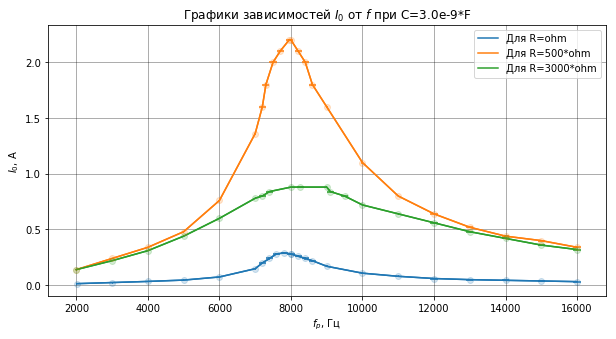

In [91]:
plt.figure(figsize=(10,5))
df=df.sort_values(by='f.0')
ml.plt_pq(df['f.0'], df['U.0'], label='Для R=%s'%R0.val)
df=df.sort_values(by='f.1')
ml.plt_pq(df['f.1'], df['U.1'], label='Для R=%s'%R1.val)
df=df.sort_values(by='f.2')
ml.plt_pq(df['f.2'].dropna(), df['U.2'].dropna(), label='Для R=%s'%R2.val)
plt.xlabel('$f_p$, Гц')
plt.ylabel('$I_0$, А')
plt.title('Графики зависимостей $I_0$ от $f$ при C=%s'%C.val)
plt.show()

In [92]:
#500 Ом
display(ml.prepare_to_print(df))

,"$f.0$, Hz","$\sigma$($f.0$), Hz","$\varepsilon$($f.0$), %","$U.0$, V","$\sigma$($U.0$), V","$\varepsilon$($U.0$), %","$f.1$, Hz","$\sigma$($f.1$), Hz","$\varepsilon$($f.1$), %","$U.1$, V",...,"$\varepsilon$($U.2$), %","$I_0.0$, $10^{-5}$V/ohm","$\sigma$($I_0.0$), V/ohm","$\epsilon$($I_0.0$), %","$I_0.1$, $10^{-5}$V/ohm","$\sigma$($I_0.1$), V/ohm","$\epsilon$($I_0.1$), %","$I_0.2$, $10^{-5}$V/ohm","$\sigma$($I_0.2$), V/ohm","$\epsilon$($I_0.2$), %"
0,2010,10,0.50,0.0140,0.0010,7.1,2000,10,0.50,0.1400,...,0.71,18.70,1.30,7.1,186.70,1.40,0.73,186.70,1.40,0.73
1,3010,10,0.33,0.0240,0.0010,4.2,3000,10,0.33,0.2400,...,0.45,32.00,1.30,4.2,320.00,1.40,0.44,293.30,1.40,0.47
2,4000,10,0.25,0.0340,0.0010,2.9,4000,10,0.25,0.3400,...,0.32,45.30,1.30,2.9,453.30,1.50,0.32,413.30,1.40,0.35
3,5000,10,0.20,0.0460,0.0020,4.3,5000,10,0.20,0.4800,...,0.45,61.30,2.70,4.3,640.00,2.80,0.44,586.70,2.80,0.47
4,6000,10,0.17,0.0740,0.0020,2.7,6000,10,0.17,0.7600,...,0.33,98.70,2.70,2.7,1013.30,3.00,0.30,800.00,2.90,0.36
5,7000,10,0.14,0.148,0.004,2.7,7000,10,0.14,1.360,...,0.26,19.7,0.5,2.7,181.3,0.6,0.32,104.0,0.3,0.29
6,8200,100,1.2,0.260,0.010,3.8,8400,100,1.2,2.000,...,0.50,34.70,1.30,3.8,266.70,1.40,0.52,106.7,0.6,0.52
7,8000,100,1.2,0.280,0.010,3.6,8200,100,1.2,2.100,...,0.48,37.30,1.30,3.6,280.00,1.40,0.49,112.0,0.6,0.49
8,8000,10,0.12,0.280,0.010,3.6,8000,10,0.12,2.200,...,0.45,37.30,1.30,3.6,293.30,1.40,0.47,117.3,0.6,0.47
9,7810,100,1.3,0.290,0.010,3.4,7950,100,1.3,2.200,...,0.45,38.70,1.30,3.5,293.30,1.40,0.47,117.3,0.6,0.47


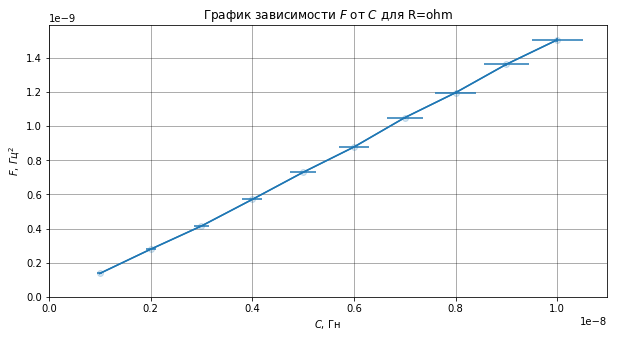

In [97]:
plt.figure(figsize=(10, 5))
ml.plt_pq(df2['C'].dropna(), df2['F'].dropna())
plt.xlabel('$C$, Гн')
plt.ylabel('$F$, $Гц^2$')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.title('График зависимости $F$ от $C$ для R=%s'%R0.val)
plt.show()

In [98]:
ols_coefs = ml.OLS(df2['C'].dropna(), df2['F'].dropna())
L = ml.PQ(ols_coefs[0][0]*u.henry, sigma=ols_coefs[1][0]*u.henry)
L

0.1540±0.0011 H (0.69%)